### Tarifa automatizada para tiquetes aéreos
    Sistema experto que muestra a los usuarios de cierta aerolinea el porcentaje tipo cargo/impuesto que se le aplica a la   tarifa neta, esto dependiendo de multiples factores(entradas) que lo afectaran y definira su precio final.

#### Entradas:
##### Horario: 
    *Universo:  escoger la horario del vuelo, en un rango de 0 a 4, conociendo que:
         -Madrugada: 12:00am a 5:59am (Opcion 1) 
         -Mañana: 6am a 11:59am (Opcion 2)  
         -Tarde: 12pm a 5:59pm (Opcion 3) 
         -Noche: 6pm a 11:59pm (Opcion 4)  
    *Conjunto difuso: basico, moderado y alto.
    
##### Clase:
    *Universo:  escoger la clase del vuelo que se desea adquirir,en un rango de 0 a 4, conociendo que: 
         -Turista (Opcion 1)
         -Turista superior(Opcion 2)
         -Ejecutiva (Opcion 3)
         -Primera clase (Opcion 4)
    *Conjunto difuso: basico, moderado y alto.   
    
#### Salida #1:
##### Precio : porcentaje que se le aplica a la tarifa neta.
    *Universo: valor adicional que incrementara el costo de la tarifa neta , en una escala de 0% a 100%         
    *Conjunto difuso: poco, considerable y mucho.   

    Para el siguiente codigo:
        -Se importa numpy para operaciones matematicas, skfuzzy para logica difusa y matplotlib para graficar.
        -Se Genera los rangos para las variables de entrada y salida (np.arange)
        -Se Genera las funciones de membresia difusas fuzz.trimf()
        -Visualizar universos y funciones de membresia en las graficas.

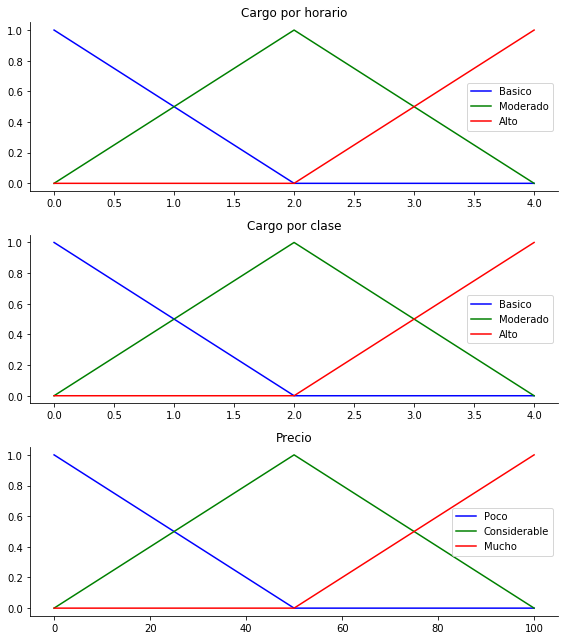

In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x_horario = np.arange(0, 5, 1)
x_clase = np.arange(0, 5, 1)
x_precio  = np.arange(0, 101, 1)

hor_bas = fuzz.trimf(x_horario, [0, 0, 2])
hor_med = fuzz.trimf(x_horario, [0, 2, 4])
hor_alt = fuzz.trimf(x_horario, [2, 4, 4])
clas_bas = fuzz.trimf(x_clase, [0, 0, 2])
clas_med = fuzz.trimf(x_clase, [0, 2, 4])
clas_alt = fuzz.trimf(x_clase, [2, 4, 4])
pre_bas = fuzz.trimf(x_precio, [0, 0, 50])
pre_med = fuzz.trimf(x_precio, [0, 50, 100])
pre_alto = fuzz.trimf(x_precio, [50, 100, 100])

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_horario, hor_bas, 'b', linewidth=1.5, label='Basico')
ax0.plot(x_horario, hor_med, 'g', linewidth=1.5, label='Moderado')
ax0.plot(x_horario, hor_alt, 'r', linewidth=1.5, label='Alto')
ax0.set_title('Cargo por horario')
ax0.legend()

ax1.plot(x_clase, clas_bas, 'b', linewidth=1.5, label='Basico')
ax1.plot(x_clase, clas_med, 'g', linewidth=1.5, label='Moderado')
ax1.plot(x_clase, clas_alt, 'r', linewidth=1.5, label='Alto')
ax1.set_title('Cargo por clase')
ax1.legend()

ax2.plot(x_precio, pre_bas, 'b', linewidth=1.5, label='Poco')
ax2.plot(x_precio, pre_med, 'g', linewidth=1.5, label='Considerable')
ax2.plot(x_precio, pre_alto, 'r', linewidth=1.5, label='Mucho')
ax2.set_title('Precio')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

     
#### Reglas
     Se establece la relacion difusa entre las variables de entrada y salida, para este ejemplo consideraremos las siguientes reglas:
     
    -Si los cargos por horario o clase fueron basicos, entonces el aumento de precio debe ser poco.
    -Si los cargos fueron moderados, entonces el aumento debe ser considerable.
    -Si los cargos por horario o clase fueron altos, entonces el aumento debe ser mucho.
   
#### Uso  de reglas
    -Para este ejemplo:
        Se selecciona el horario de vuelo en la mañana(2)
        Se selecciona la clase ejecutiva(3)

    Para el siguiente codigo:
        -Se necesita la activacion de nuestras funciones de membresia difusas con los valores seleccionados, para eso
        se utilizan la funcion fuzz.interp_membership() ya que los valores dados no existen en nuestro universo.
        -Aplicar las reglas, si tiene el condicional 'o' se utiliza la funcion fmax() y fmin() para recortar la 
        funcion de membresia
        -Visualizar en el grafico en donde esta concentrada la actividad de salida.

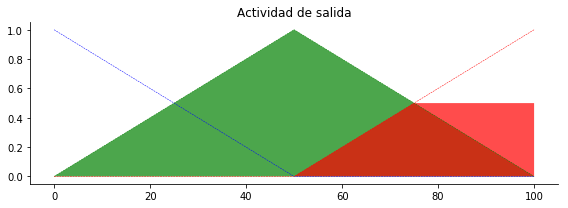

In [8]:
hor_nivel_n = fuzz.interp_membership(x_horario, hor_bas, 2)
hor_nivel_t = fuzz.interp_membership(x_horario, hor_med, 2)
hor_nivel_m = fuzz.interp_membership(x_horario, hor_alt, 2)

clas_nivel_e = fuzz.interp_membership(x_clase, clas_bas, 3)
clas_nivel_b = fuzz.interp_membership(x_clase, clas_med, 3)
clas_nivel_p = fuzz.interp_membership(x_clase, clas_alt, 3)

regla_activa1 = np.fmax(hor_nivel_n, clas_nivel_e)

activacion_bas = np.fmin(regla_activa1, pre_bas) 

activacion_med = np.fmin(hor_nivel_t, pre_med)

regla_activa3 = np.fmax(hor_nivel_m, clas_nivel_p)
activacion_alt = np.fmin(regla_activa3, pre_alto)
pre0 = np.zeros_like(x_precio)

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_precio, pre0, activacion_bas, facecolor='b', alpha=0.7)
ax0.plot(x_precio, pre_bas, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_precio, pre0, activacion_med, facecolor='g', alpha=0.7)
ax0.plot(x_precio, pre_med, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_precio, pre0, activacion_alt, facecolor='r', alpha=0.7)
ax0.plot(x_precio, pre_alto, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Actividad de salida')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

#### Agregacion de reglas.
    Sabiendo la actividad de cada funcion de membresia, todas estas deben ser combiandas, a este paso se le llama agregacion.

#### Defuzzificacion.
    Para obtener una respuesta real, volvemos a una logica nitida 'crisp' desde las funciones de membresia difusa, para esto se  usa el centroide.

    Para el siguiente codigo:
        -Agregamos las tres funciones de membresias en la variable aggregated.
        -Calculamos el resultado defusificado.
        -Visualizamos en la grafica el valor arrojado por el sistema señalizado por una linea vertical.

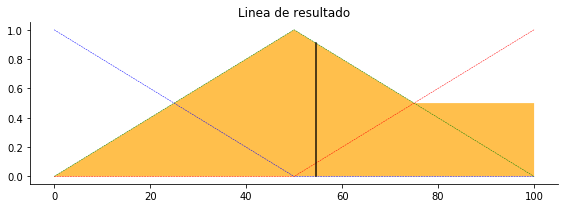

In [9]:
aggregated = np.fmax(activacion_bas,
                     np.fmax(activacion_med, activacion_alt))

precio = fuzz.defuzz(x_precio, aggregated, 'centroid')
activacion = fuzz.interp_membership(x_precio, aggregated, precio)  # for plot

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_precio, pre_bas, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_precio, pre_med, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_precio, pre_alto, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_precio, pre0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([precio, precio], [0, activacion], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Linea de resultado')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

#### Resultado
    El sistema sugeriere que el precio del tiquete aumentara en un 54.62% por los cargos de horario y clase del vuelo.

In [16]:
## Resultado de la salida #1
precio

54.629629629629633

#### Entradas:
##### Edad: 
    *Universo: seleccionar la edad de la persona que viaja, en un rango de 0 a 6, conociendo que:
         -Infantes: 0 - 3 años (Opcion 1) 
         -Adolescente: 13 a 17 años (Opcion 2)  
         -Joven: 18 a 26 años (Opcion 3) 
         -Adultos jovenes;  27 a 35 (Opcion 4)
         -Adultos: 36 a 50 (Opcion 5)
         -Tercera edad: 60+ (Opcion 6)
    *Conjunto difuso: basico, moderado y alto.
    
##### Dia :
    *Universo:  escoger el dia de la semana en que se desea viajar,en un rango de 0 a 6, conociendo que: 
         -Lunes (Opcion 1)
         -Martes(Opcion 2)
         -Miercoles (Opcion 3)
         -Jueves (Opcion 4)
         -Viernes (opcion 5)
         -Sabado y Domingo(opcion 6)
    *Conjunto difuso: basico, moderado y alto.   
    
#### Salida #2:
##### Precio : porcentaje que se le aplica a la tarifa neta.
    *Universo: valor adicional que incrementara el costo de la tarifa neta , en una escala de 0% a 100%         
    *Conjunto difuso: poco, considerable y mucho.   

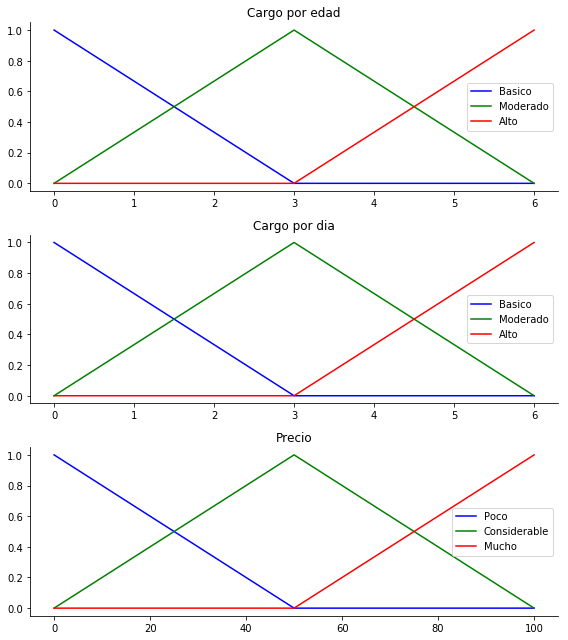

In [39]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x_edad = np.arange(0, 7, 1)
x_dia = np.arange(0, 7, 1)
x_precio1  = np.arange(0, 101, 1)

ed_bas = fuzz.trimf(x_edad, [0, 0, 3])
ed_med = fuzz.trimf(x_edad, [0, 3, 6])
ed_alt = fuzz.trimf(x_edad, [3, 6, 6])
dia_bas = fuzz.trimf(x_dia, [0, 0, 3])
dia_med = fuzz.trimf(x_dia, [0, 3, 6])
dia_alt = fuzz.trimf(x_dia, [3, 6, 6])
pre1_bas = fuzz.trimf(x_precio1, [0, 0, 50])
pre1_med = fuzz.trimf(x_precio1, [0, 50, 100])
pre1_alto = fuzz.trimf(x_precio1, [50, 100, 100])

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_edad, ed_bas, 'b', linewidth=1.5, label='Basico')
ax0.plot(x_edad, ed_med, 'g', linewidth=1.5, label='Moderado')
ax0.plot(x_edad, ed_alt, 'r', linewidth=1.5, label='Alto')
ax0.set_title('Cargo por edad')
ax0.legend()

ax1.plot(x_dia, dia_bas, 'b', linewidth=1.5, label='Basico')
ax1.plot(x_dia, dia_med, 'g', linewidth=1.5, label='Moderado')
ax1.plot(x_dia, dia_alt, 'r', linewidth=1.5, label='Alto')
ax1.set_title('Cargo por dia')
ax1.legend()

ax2.plot(x_precio1, pre1_bas, 'b', linewidth=1.5, label='Poco')
ax2.plot(x_precio1, pre1_med, 'g', linewidth=1.5, label='Considerable')
ax2.plot(x_precio1, pre1_alto, 'r', linewidth=1.5, label='Mucho')
ax2.set_title('Precio')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

#### Reglas
     Se establece la relacion difusa entre las variables de entrada y salida, para este ejemplo consideraremos las siguientes reglas:
     
    -Si los cargos por edad o dia fueron basicos, entonces el aumento de precio debe ser poco.
    -Si los cargos fueron moderados, entonces el aumento debe ser considerable.
    -Si los cargos por edad o dia fueron altos, entonces el aumento debe ser mucho.
   
#### Uso  de reglas
    -Para este ejemplo:
        la edad correponde a un adulto joven(4)
        Se selecciona martes como dia de vuelo(2)

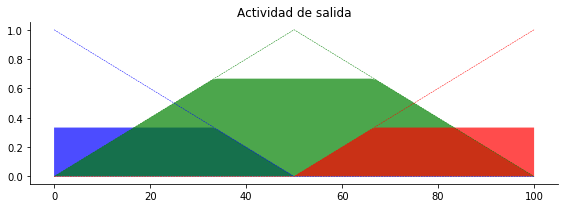

In [40]:
ed_nivel_n = fuzz.interp_membership(x_edad, ed_bas, 4)
ed_nivel_t = fuzz.interp_membership(x_edad, ed_med, 4)
ed_nivel_m = fuzz.interp_membership(x_edad, ed_alt, 4)

dia_nivel_e = fuzz.interp_membership(x_dia, dia_bas, 2)
dia_nivel_b = fuzz.interp_membership(x_dia, dia_med, 2)
dia_nivel_p = fuzz.interp_membership(x_dia, dia_alt, 2)

regla1_activa1 = np.fmax(ed_nivel_n, dia_nivel_e)

activacion1_bas = np.fmin(regla1_activa1, pre1_bas) 

activacion1_med = np.fmin(ed_nivel_t, pre1_med)

regla1_activa3 = np.fmax(ed_nivel_m, dia_nivel_p)
activacion1_alt = np.fmin(regla1_activa3, pre1_alto)
pre1 = np.zeros_like(x_precio1)

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_precio1, pre1, activacion1_bas, facecolor='b', alpha=0.7)
ax0.plot(x_precio1, pre1_bas, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_precio1, pre1, activacion1_med, facecolor='g', alpha=0.7)
ax0.plot(x_precio1, pre1_med, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_precio1, pre1, activacion1_alt, facecolor='r', alpha=0.7)
ax0.plot(x_precio1, pre1_alto, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Actividad de salida')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

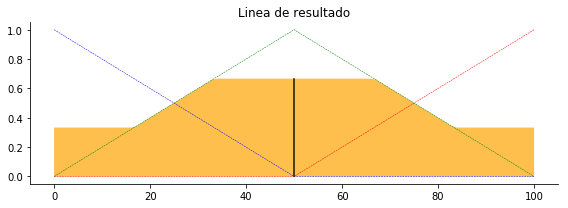

In [41]:
aggregated1 = np.fmax(activacion1_bas,
                     np.fmax(activacion1_med, activacion1_alt))

precio1 = fuzz.defuzz(x_precio1, aggregated1, 'centroid')
activacion1 = fuzz.interp_membership(x_precio1, aggregated1, precio1)  # for plot

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_precio1, pre1_bas, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_precio1, pre1_med, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_precio1, pre1_alto, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_precio1, pre1, aggregated1, facecolor='Orange', alpha=0.7)
ax0.plot([precio1, precio1], [0, activacion1], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Linea de resultado')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

#### Resultado
    El sistema sugeriere que el precio del tiquete aumentara en un 49.9% por los cargos de edad y dia de vuelo.

In [42]:
## Resultado de la salida #2
precio1

49.999999999999972

In [50]:
precio+precio1

104.6296296296296

### Los cargos totales por horario, clase, edad y dia haran que aumente el precio en un 104,62% con respecto a la tarifa neta.